<a href="https://colab.research.google.com/github/StevenBryceLee/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Steven_Lee_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

https://colab.research.google.com/drive/1b3h2qg500f3n-P4xwG7uuarjlWMhrU2U?usp=sharing

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [179]:
def calcmean(numlist):
  '''
  This function calculates means the old fashioned way
  returns the mean of a list
  '''
  x = 0
  for val in numlist:
    x += val
  x /= len(numlist)
  return x

In [53]:
def calcstdev(numlist):
  '''
  This function calculates the sample standard deviation of a list
  '''
  xbar = calcmean(numlist)
  squared_dif = [(val - xbar) ** 2 for val in numlist]
  sum_of_dif = 0
  for val in squared_dif:
    sum_of_dif += val
  return (sum_of_dif / (len(numlist)-1)) ** (0.5)

In [181]:
calcmean([3505, 2400, 3027, 2798, 3700, 3250, 2689])

3052.714285714286

In [182]:
calcstdev([3505, 2400, 3027, 2798, 3700, 3250, 2689])

463.0204150595357

In [183]:
import numpy as np
np.mean([3505, 2400, 3027, 2798, 3700, 3250, 2689])

3052.714285714286

In [184]:
np.std([3505, 2400, 3027, 2798, 3700, 3250, 2689],ddof=1)

463.0204150595357

In [185]:
#Variance would be std ** 2
calcstdev([3505, 2400, 3027, 2798, 3700, 3250, 2689]) ** 2

214387.90476190473

Everything agrees with numpy.

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [21]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
cust = [127, 80, 105, 92, 120, 115, 93]

In [45]:
def covariance(numlist1, numlist2):
  '''
  Grokking covariance 
  returns the covariance between two lists of numbers, assuming sample data
  covariance represents the amount that variables 'vary' together
  '''
  #Get means
  xbar = calcmean(numlist1)
  ybar = calcmean(numlist2)
  #get squared differences
  squared_dif = [(xval - xbar) * (yval - ybar) for xval, yval in zip(numlist1,numlist2)]
  #Sum the squared differences
  sum_of_dif = 0
  for val in squared_dif:
    sum_of_dif += val
  #divide by n - 1
  return sum_of_dif / (len(numlist1)-1)

In [46]:
covariance(sales,cust)

7604.357142857142

In [48]:
np.cov(sales,cust)[0][1]

7604.357142857142

In [ ]:
#covariance is unbounded, and results of the manual calculation and numpy agree

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [54]:
def correlation(numlist1,numlist2):
  '''
  Returns the pearson correlation coefficient, or r value
  '''
  #Get covariance between x and y
  cov = covariance(numlist1,numlist2)

  #Get standard deviations
  xstd = calcstdev(numlist1)
  ystd = calcstdev(numlist2)

  return cov / (xstd * ystd)

In [55]:
correlation(sales,cust)

0.9628339778148909

In [56]:
from scipy import stats
r,p = stats.pearsonr(sales,cust)

In [57]:
r

0.9628339778148907

correlation done by hand agrees with r value from stats module

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [90]:
import pandas as pd

In [91]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
df = pd.read_csv(url,index_col='Unnamed: 0')
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [92]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [93]:
pd.get_dummies(df['sex']).head(2)

,female,male
1,1,0
2,0,1


In [94]:
df = pd.concat([df,pd.get_dummies(df['sex'])],axis=1).drop('sex',axis=1)
df.head(3)

,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number,female,male
1,1.0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,1,0
2,1.0,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1,0,1
3,1.0,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,1,0


In [95]:
df.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number,female,male
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992,-0.050011,0.050011
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406,0.123090,-0.123090
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138,-0.353932,0.353932
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946,0.054690,-0.054690
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316,0.088362,-0.088362
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961,4.600321,-4.600321
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689,0.387672,-0.387672
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613,0.027549,-0.027377
female,-0.050011,0.123090,-0.353932,0.054690,0.088362,4.600321,0.387672,0.027549,0.229360,-0.229088
male,0.050011,-0.123090,0.353932,-0.054690,-0.088362,-4.600321,-0.387672,-0.027377,-0.229088,0.229580


df.cov returns a symmetric matrix, holding variance on the main diagonal and covariance on all other values. Therefore, we see that covariance between female and survived is 0.123090. Since females and males are the only two categories, the covariance is negative for males, and therefore we could probably drop male or female since the information is completely stored in one or another variable

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

0


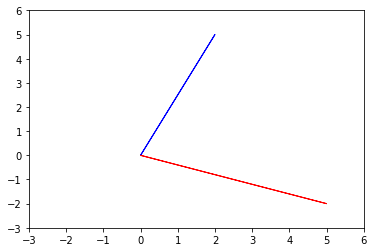

In [101]:
#orthogonal means perpendicular. 

import matplotlib.pyplot as plt
vec = [2,5]
tor = [5,-2]
print(np.vdot(vec,tor))
plt.arrow(0, 0, vec[0], vec[1], color='blue')
plt.arrow(0, 0, tor[0], tor[1], color='red')
plt.xlim(-3,6)
plt.ylim(-3,6)


plt.show()

Although they don't appear to be orthogonal, they are as shown by their dot product being 0, which is printed above the graph. 

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [102]:
#Checking with the dot product
a = np.array([-5,3,7])
b = np.array([6,-8,2])
print(np.vdot(a,b))

-40


In [ ]:
#No, they point in different directions actually because the dot product is negative
#The angle, if plotted, would be obtuse

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [104]:
c = np.array([2,-15,6,20])
norm = np.linalg.norm(c) 
norm ** 2

665.0

In [106]:
np.vdot(c,c)

665

In [107]:
np.matmul(c.T,c)

665

This is happening because the norm is the square root of the sum of squared values in the vector. Squaring the norm gives us the sum of squared values. The dot product of two identical vectors are the sum of squared values. The result of matrix multiplication of a vector and its transpose is equivalent to the dot product operation

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{equation*}
d = 7 * 
\begin{bmatrix}
1 \\
0
\end{bmatrix}
+ 12 * 
\begin{bmatrix}
0 \\
1
\end{bmatrix}
\end{equation*}

\begin{equation*}
e = 2 * 
\begin{bmatrix}
1 \\
0 \\
0
\end{bmatrix}
+ 11 * 
\begin{bmatrix}
0 \\
1\\
0
\end{bmatrix}
+ 8 * 
\begin{bmatrix}
0 \\
0\\
1
\end{bmatrix}
\end{equation*}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [111]:
f = np.array([4,12,11,9,2])
fnorm = np.linalg.norm(f)
funit = f / fnorm
funit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

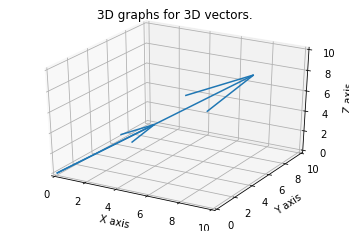

In [112]:
#Linearly dependent
from mpl_toolkits.mplot3d import Axes3D

#These will have the same direction, different magnitudes
c = [4,4,4]
d = [8,8,8]

vector1 = np.array([[0, 0, 0, c[0], c[1], c[2]]])
vector2 = np.array([[0, 0, 0, d[0], d[1], d[2]]])

#Plot the first arrow
X, Y, Z, U, V, W = zip(*vector1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
#plot the second arrow
X, Y, Z, U, V, W = zip(*vector2)
ax.quiver(X, Y, Z, U, V, W, length=1)

ax.set_title(label="3D graphs for 3D vectors.")
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

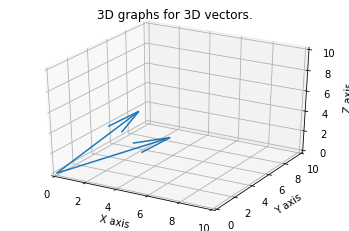

In [113]:
#Linearly independent
from mpl_toolkits.mplot3d import Axes3D

c = [5,4,3]
d = [3,4,5]

vector1 = np.array([[0, 0, 0, c[0], c[1], c[2]]])
vector2 = np.array([[0, 0, 0, d[0], d[1], d[2]]])

X, Y, Z, U, V, W = zip(*vector1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)

X, Y, Z, U, V, W = zip(*vector2)
ax.quiver(X, Y, Z, U, V, W, length=1)

ax.set_title(label="3D graphs for 3D vectors.")
ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
ax.set_zlim([0, 10])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

20


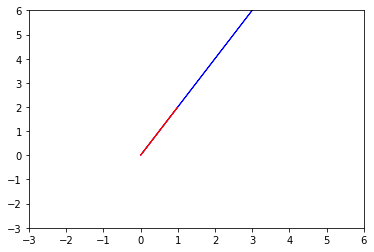

In [116]:
#Span = 1 because the maximum linear combination of these vectors can be described in 1D

vec = np.array([1,2])
tor = np.array([4,8])
print(np.vdot(vec,tor))

plt.arrow(0, 0, tor[0], tor[1], color='blue')
plt.arrow(0, 0, vec[0], vec[1], color='red')
plt.xlim(-3,6)
plt.ylim(-3,6)


plt.show()

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [117]:
#compose into a matrix, then find the rank of that matrix 
#to find the number of linearly independent vectors

span = np.array([[1,2,3],
                 [-1,0,7],
                 [4,8,2]])
#Span is 3 because each vector is linearly independent
np.linalg.matrix_rank(span)

3

Since the matrix rank of the matrix composed of {l,m,n} is 3, the span of those three vectors is also 3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


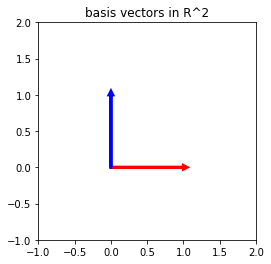

In [118]:
#Just the unit vectors for R^2
#Rows and columns of identity matrix for that space can be used
#This is technically the orthonormal basis since they have unit length

plt.xlim(-1,2)          
plt.ylim(-1,2)

# Unit Vectors
i_hat = [1,0]
j_hat = [0,1]

# Fix Axes
plt.axes().set_aspect('equal')

# PLot Vectors
plt.arrow(0, 0, i_hat[0], i_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, j_hat[0], j_hat[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.title("basis vectors in R^2")
plt.show()



## 6.2 What does it mean to form a basis?

The basis of a vector space is a set of linearly independent vectors that span that vector space. From a basis, one could decompose the vectors into unit vectors and use scalars to form any vector in that vector space

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [119]:
p = np.array([[1,2,3],
              [-1,0,7],
              [4,8,2]])

np.linalg.matrix_rank(p)

3

## 7.2 What does the rank of a matrix tell us?

Rank is the number of linearly independent vectors within that matrix. If the rank of the matrix is less than the number of columns, then we know that one part of the matrix is linearly dependent, and therefore redundant

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [145]:
def project(vect1,vect2):
  '''
  Project vector 1 onto vector 2
  Returns vector 1 projected onto vector 2
  '''
  numer = np.dot(vect1,vect2)
  denom = int(np.linalg.norm(vect2)**2)
  total = numer/denom
  
  (numer/denom)*vect2
  return (np.vdot(vect1,vect2)/ np.linalg.norm(vect2)**2 ) * vect2

In [147]:
v = np.array([1,3]) 
w = np.array([-1,2])
proj = project(w,v)
proj

array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


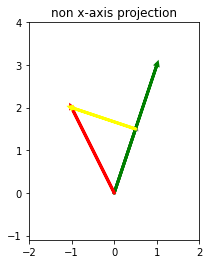

In [152]:
# Axis Bounds
plt.xlim(-2,2)          
plt.ylim(-1.1,4)

# Original Vector
v = np.array([1,3]) 
w = np.array([-1,2])
proj = project(w,v)
x_minus_proj = w-proj

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

plt.title("non x-axis projection")
plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

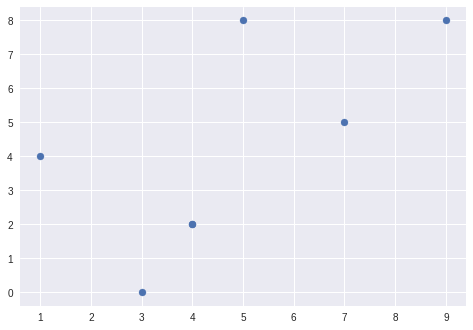

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()

In [155]:
#Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x.
df.head(3)

,x,y
0,1,4
1,4,2
2,7,5


In [166]:
#Getting vectors
vects = [np.array(df.iloc[index,:].values) for index in df.index]
vects


[array([1, 4]),
 array([4, 2]),
 array([7, 5]),
 array([3, 0]),
 array([9, 8]),
 array([4, 2]),
 array([5, 8])]

In [168]:
#Make our x = y vector
xy = np.array([10,10])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


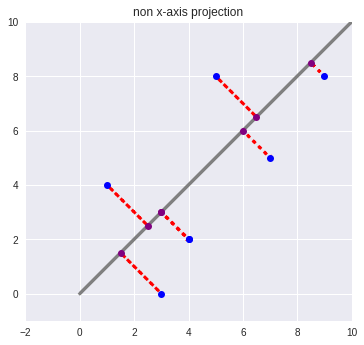

In [178]:
# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Axis Bounds
plt.xlim(-2,10)          
plt.ylim(-1,10)

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals



# Plot xy vector
plt.arrow(0, 0, xy[0], xy[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')

for vect in vects:
  #plot original data point vectors
  #plt.arrow(0, 0, vect[0], vect[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
  #Commented out vectors to replace with original points
  plt.plot(vect[0],vect[1],color='blue',marker = 'o')
  #Get projection
  proj = project(vect,xy)
  #plot point on line
  plt.plot(proj[0],proj[1],color = 'purple',marker='o')
  #Get end point for projection
  x_minus_proj = vect-proj
  #Plot arrow going from original point to projection
  plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'red',linestyle = ':')

plt.title("non x-axis projection")
plt.show()